In [6]:
from sklearn.datasets import load_boston

boston = load_boston() #波士顿房价数据
X=boston.data
y=boston.target
X.shape #一共十三个变量，采用多元线性回归

(506, 13)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state = 3)


In [19]:
import time
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True) #线性回归模型，数据归一化

start = time.time()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
cv_score = model.score(X_test,y_test)
print ('elaspe:{0:.6f};train_score:{1:6f};cv_score:{2:.6f}'.format(time.time()-start,train_score,cv_score))


elaspe:0.002561;train_score:0.723941;cv_score:0.795262


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias = True)
    linear_regression = LinearRegression(normalize=True) #加速收敛
    pipeline = Pipeline([("polynomail_features",polynomial_features),("linear_regression",linear_regression)])
    return pipeline
for i in range(1,4):
    model = polynomial_model(degree=i)
    start = time.time()
    model.fit(X_train,y_train)

    train_score = model.score(X_train,y_train)
    cv_score = model.score(X_test,y_test)
    print ('elaspe:{0:.6f};train_score:{1:6f};cv_score:{2:.6f}'.format(time.time()-start,train_score,cv_score))



elaspe:0.003801;train_score:0.723941;cv_score:0.795262
elaspe:0.037447;train_score:0.930547;cv_score:0.860049
elaspe:0.151226;train_score:1.000000;cv_score:-104.235802


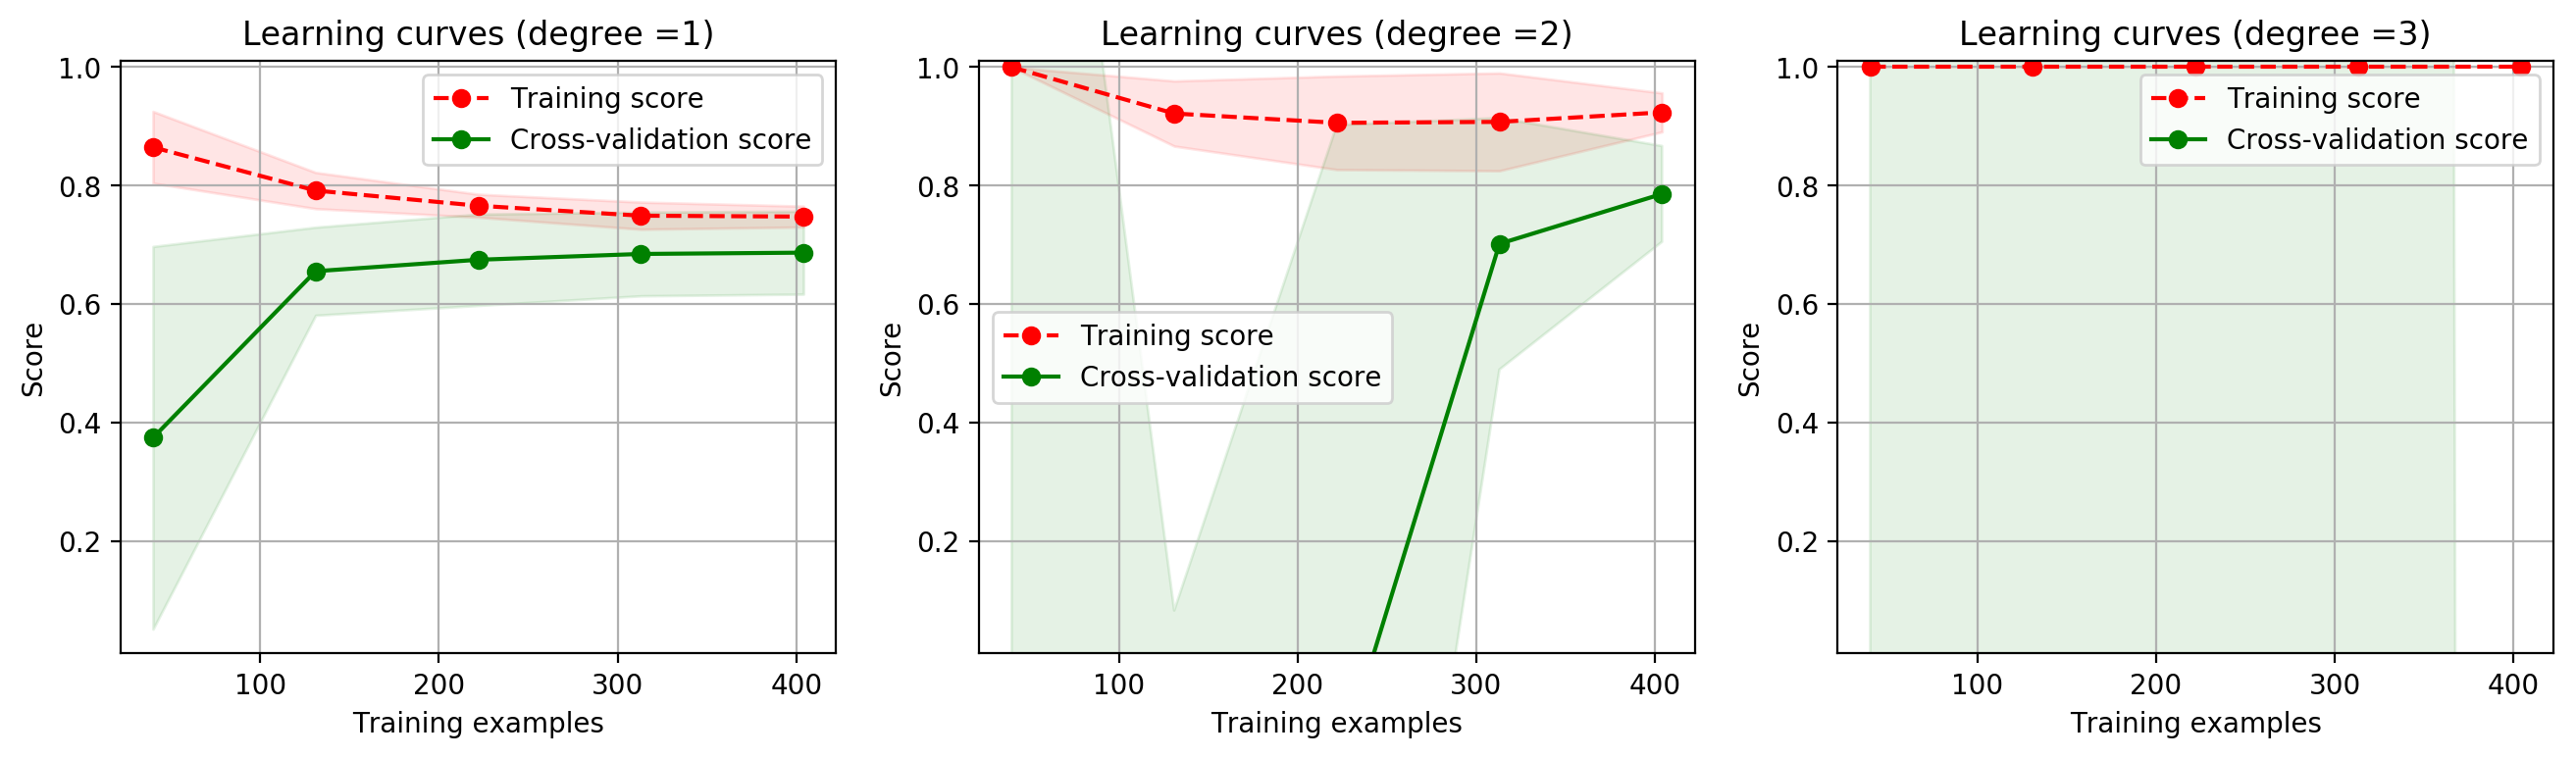

In [35]:
#绘制学习曲线
import matplotlib.pyplot as plt
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 10,test_size = .2,random_state = 0)
plt.figure(figsize = (16,4),dpi =200)
title = 'Learning curves (degree ={0})'
degrees = [1,2,3]
start = time.time()
plt.figure(figsize=(16,4),dpi = 200)
for i in range(len(degrees)):
    plt.subplot(1,3,i+1)
    plot_learning_curve(plt,polynomial_model(degrees[i]),title.format(degrees[i]),X,y,ylim=(.01,1.01),cv=cv)
